In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [25]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
print(train.info())
print(train.describe())
print(test.info())
print(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
ind_na = train.isna().sum().values
columns_na = train.columns[ind_na>100]
train.drop(columns_na,axis=1,inplace=True)
test.drop(columns_na,axis=1,inplace=True)

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')


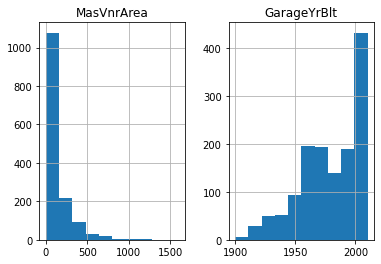

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
ind_na = train.isna().sum().values
columns_na = train.columns[ind_na>0]
train[columns_na].hist()
print(columns_na)

In [28]:
columns_na = list(columns_na)
train[['MasVnrArea','GarageYrBlt']] = train[['MasVnrArea','GarageYrBlt']].fillna(train[['MasVnrArea','GarageYrBlt']].median())
print(columns_na)
for col in ['MasVnrArea','GarageYrBlt']:
    columns_na.remove(col)
print(columns_na)
fill_values = list(train[columns_na].value_counts().index[0])
fill = {columns_na[i]:fill_values[i] for i in range(len(columns_na))}
train = train.fillna(value=fill)

['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64


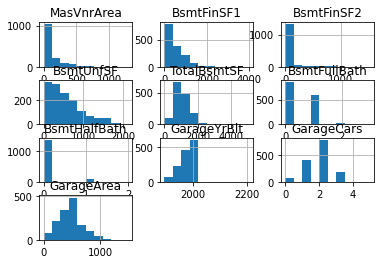

In [29]:
ind_na = test.isna().sum().values
columns_na = list(test.columns[ind_na>0])
test[columns_na].hist()
num_columns = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',\
               'BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea']
test[num_columns] = test[num_columns].fillna(test[num_columns].median())
for col in num_columns:
    columns_na.remove(col)
fill_values = list(test[columns_na].value_counts().index[0])
fill = {columns_na[i]:fill_values[i] for i in range(len(columns_na))}
test = test.fillna(value=fill)
print(test.isna().sum())

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skew is 1.88
kurtosis is 6.54


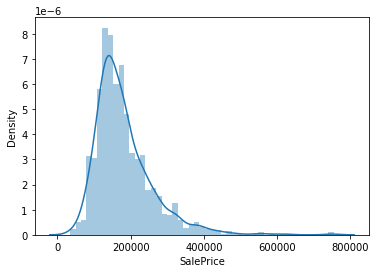

In [30]:
from scipy import stats
sns.distplot(train['SalePrice'],kde=True)
print("skew is {:.2f}".format(train['SalePrice'].skew()))
print("kurtosis is {:.2f}".format(train['SalePrice'].kurtosis()))

<AxesSubplot:>

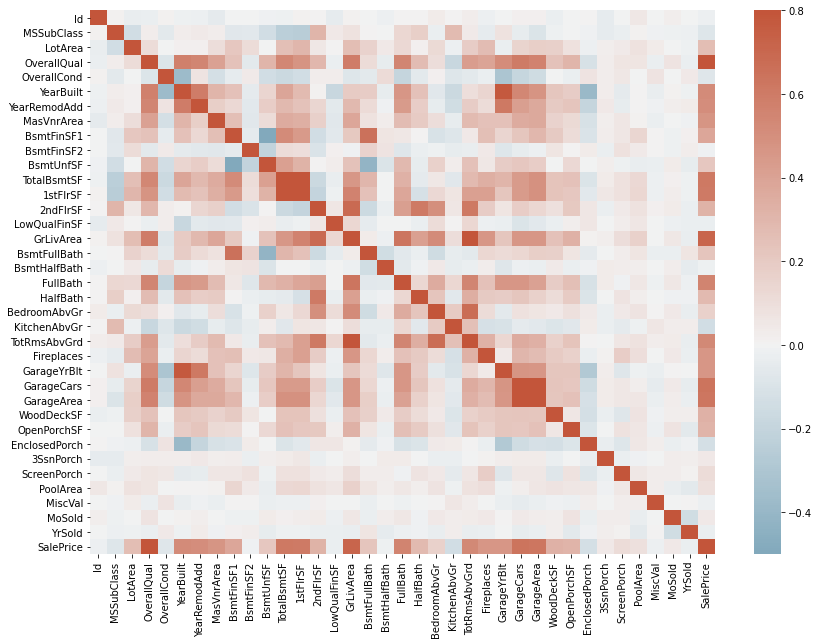

In [31]:
corrs = train.corr()
plt.figure(figsize = (14,10))
sns.heatmap(corrs,cmap=sns.diverging_palette(230,20,as_cmap=True),vmin=-0.5,vmax = 0.8,center=0)

In [32]:
train = train.drop(['Id','GarageCars'],axis=1)
train['FullBath'] = train['FullBath'] + train['HalfBath']*0.5 + train['BsmtFullBath'] + train['BsmtHalfBath']*0.5
train['BsmtFinishSF'] = train['BsmtFinSF1'] + train['BsmtFinSF2']
train['TotalInArea'] = train['TotalBsmtSF'] + train['GrLivArea']
train['TotalOutArea'] = train['LotArea'] + train['MasVnrArea'] + train['PoolArea'] + train['GarageArea']
train = train.drop(['HalfBath','BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','GarageYrBlt',\
                   'OverallCond','MoSold'],axis=1)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [33]:
for col in train.columns:
    if ('Area' in col) | ('SF' in col) | ('Porch' in col):
        train[col] = train[col].astype('float64')
train['MiscVal'] = train['MiscVal'].astype('float64')
train['SalePrice'] = train['SalePrice'].astype('float64')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   float64
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [34]:
test = test.drop(['Id','GarageCars'],axis=1)
test['FullBath'] = test['FullBath'] + test['HalfBath']*0.5 + test['BsmtFullBath'] + test['BsmtHalfBath']*0.5
test['BsmtFinishSF'] = test['BsmtFinSF1'] + test['BsmtFinSF2']
test['TotalInArea'] = test['TotalBsmtSF'] + test['GrLivArea']
test['TotalOutArea'] = test['LotArea'] + test['MasVnrArea'] + test['PoolArea'] + test['GarageArea']
test = test.drop(['HalfBath','BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','GarageYrBlt',\
                   'OverallCond','MoSold'],axis=1)
for col in test.columns:
    if ('Area' in col) | ('SF' in col) | ('Porch' in col):
        test[col] = test[col].astype('float64')
test['MiscVal'] = test['MiscVal'].astype('float64')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   float64
 3   Street         1459 non-null   object 
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   Utilities      1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   int64  
 17  RoofStyle      1459 non-null   object 
 18  RoofMatl

In [35]:
for col in train.columns[train.dtypes=='int64']:
    train[col] = train[col].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_features = train.drop('SalePrice',axis=1)
train_features_label = train_features.copy()
for col in train_features_label.columns[train_features_label.dtypes=='object']:
    train_features_label[col] = le.fit_transform(train_features_label[col])

In [37]:
for col in test.columns[test.dtypes=='int64']:
    test[col] = test[col].astype('str')
le = LabelEncoder()
test_features_label = test.copy()
for col in test_features_label.columns[test_features_label.dtypes=='object']:
    test_features_label[col] = le.fit_transform(test_features_label[col])

In [38]:
from xgboost import XGBRegressor 
labels = train['SalePrice']
xgb = XGBRegressor()
xgb.fit(train_features_label,labels)
print(xgb.score(train_features_label,labels))

0.9994412874314605


In [40]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
ids = test.Id
predict = xgb.predict(test_features_label)
submission = pd.DataFrame({'Id':ids,'SalePrice':predict})
print(submission.head())
submission.to_csv("mysubmission.csv", index = False, header = True)

     Id      SalePrice
0  1461  125923.617188
1  1462  179001.562500
2  1463  179206.968750
3  1464  185169.468750
4  1465  202717.265625
